# DEXOM Diversity-enum sensibility analysis

Sensibility analysis varing the parameter $d_s$

In [1]:
%matplotlib inline

import umap
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

sns.set_style("whitegrid")

In [2]:
c_icut = "#e4eaed"
c_icut2 = "#34495e"
c_rxnenum = "#065535"
c_rxnenum = "#cf9b00"
c_dexom = "#e74c3c"
c_maxdist = "#6a3d9a"


list_colors = [c_dexom, c_maxdist, c_rxnenum, c_icut2]

state = np.random.RandomState(seed=42)

In [3]:
def plot_embedding(ax, df_embedding, method, color, title):
    ax.set(aspect='equal')
    sns.scatterplot(x='UMAP1', y='UMAP2', data = df_embedding[['UMAP1','UMAP2']], ax = ax, linewidth=0,
                    alpha=background_alpha, color=c_icut, rasterized=True)
    df = df_embedding[df_embedding.method==method]
    sns.scatterplot(x='UMAP1', y='UMAP2', data = df, ax = ax, linewidth=0, alpha=method_alpha, color=color, rasterized=True)
    ax.set_title(title, fontsize=14)
    
def plot_distances(ax, df_distances, list_methods, list_colors, alpha=0.05):
    for m, c in zip(list_methods, list_colors):
        df_distances.loc[m, :].transpose().plot(color=c, alpha=alpha, legend=False, ax=ax)

## DAG sampling

In [4]:
# NOTE: Results are exported using the exportResults.m script included in DEXOM and the matlab files

df_dexom0990 = pd.read_csv('results/yeast/random/sensibility/0990/allSolutionsIntVar.csv.zip', header=None)
df_dexom0995 = pd.read_csv('results/yeast/random/sensibility/0995/allSolutionsIntVar.csv.zip', header=None)
df_dexom0997 = pd.read_csv('results/yeast/random/sensibility/0997/allSolutionsIntVar.csv.zip', header=None)
df_dexom0999 = pd.read_csv('results/yeast/random/sensibility/0999/allSolutionsIntVar.csv.zip', header=None)

df_all = pd.concat([df_dexom0990, df_dexom0995, df_dexom0997, df_dexom0999], ignore_index=True)

labels = ['Diversity-enum $d_s$=0.990'] * df_dexom0990.shape[0] + ['Diversity-enum $d_s$=0.995'] * df_dexom0995.shape[0] + ['Diversity-enum $d_s$=0.997'] * df_dexom0997.shape[0] + ['Diversity-enum $d_s$=0.999'] * df_dexom0999.shape[0]

embedding = umap.UMAP(metric="hamming", random_state=state, n_neighbors=30, unique=True).fit_transform(df_all)

df_embedding = pd.DataFrame(embedding, columns=['UMAP1','UMAP2'])
df_embedding['method'] = labels
df_embedding.head()

C:\Users\pablo\miniconda3\lib\site-packages\umap\umap_.py:1530: UserWarning: gradient function is not yet implemented for hamming distance metric; inverse_transform will be unavailable
  "inverse_transform will be unavailable".format(self.metric)


,UMAP1,UMAP2,method
0,16.560982,-5.772191,Diversity-enum $d_s$=0.990
1,16.346031,-5.426975,Diversity-enum $d_s$=0.990
2,17.238621,-6.327926,Diversity-enum $d_s$=0.990
3,16.932884,-5.984384,Diversity-enum $d_s$=0.990
4,16.777969,-0.571218,Diversity-enum $d_s$=0.990


In [5]:
methods = ['Diversity-enum $d_s$=0.990', 'Diversity-enum $d_s$=0.995', 
           'Diversity-enum $d_s$=0.997', 'Diversity-enum $d_s$=0.999']

mean_dist_0990 = pd.read_csv('results/yeast/random/sensibility/0990/mean_dist.csv.zip', header=None)
mean_dist_0995 = pd.read_csv('results/yeast/random/sensibility/0995/mean_dist.csv.zip', header=None)
mean_dist_0997 = pd.read_csv('results/yeast/random/sensibility/0997/mean_dist.csv.zip', header=None)
mean_dist_0999 = pd.read_csv('results/yeast/random/sensibility/0999/mean_dist.csv.zip', header=None)
mean_dist = pd.concat([mean_dist_0990, mean_dist_0995, mean_dist_0997, mean_dist_0999], ignore_index=True)
mean_dist['method'] = methods
mean_dist = mean_dist.set_index('method')

mean_nn_dist_0990 = pd.read_csv('results/yeast/random/sensibility/0990/mean_nn_dist.csv.zip', header=None)
mean_nn_dist_0995 = pd.read_csv('results/yeast/random/sensibility/0995/mean_nn_dist.csv.zip', header=None)
mean_nn_dist_0997 = pd.read_csv('results/yeast/random/sensibility/0997/mean_nn_dist.csv.zip', header=None)
mean_nn_dist_0999 = pd.read_csv('results/yeast/random/sensibility/0999/mean_nn_dist.csv.zip', header=None)
mean_nn_dist = pd.concat([mean_nn_dist_0990, mean_nn_dist_0995, mean_nn_dist_0997, mean_nn_dist_0999], ignore_index=True)
mean_nn_dist['method'] = methods
mean_nn_dist = mean_nn_dist.set_index('method')

mean_dist = mean_dist.drop(range(20), axis=1)
mean_nn_dist = mean_nn_dist.drop(range(20), axis=1)

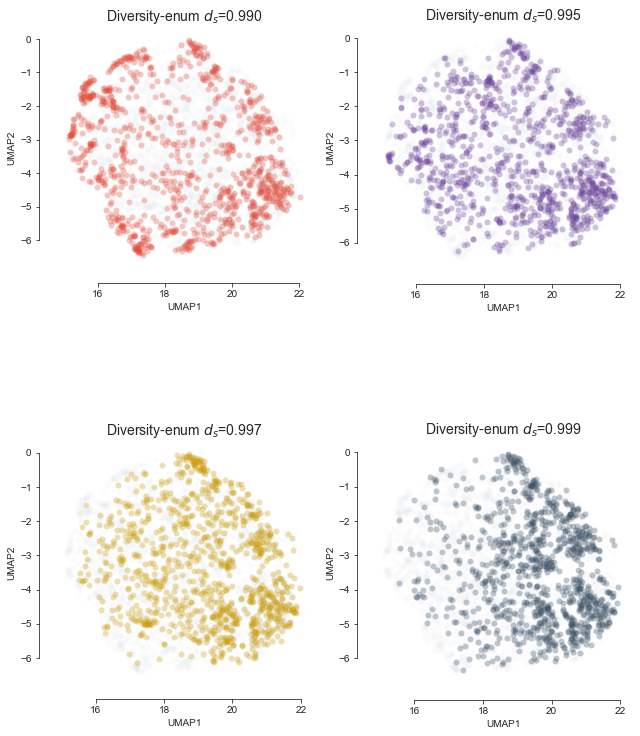

In [6]:
sns.set_style("ticks")
show_distances = False
rows = 2

if show_distances:
    rows = 3
    
fig, axs = plt.subplots(rows, 2, figsize=(9, 12), sharey=False)

background_alpha = 0.1
method_alpha = 0.3

ax = axs[0,0]
plot_embedding(ax, df_embedding, methods[0], c_dexom, methods[0])

ax = axs[0,1]
plot_embedding(ax, df_embedding, methods[1], c_maxdist, methods[1])

ax = axs[1,0]
plot_embedding(ax, df_embedding, methods[2], c_rxnenum, methods[2])

ax = axs[1,1]
plot_embedding(ax, df_embedding, methods[3], c_icut2, methods[3])

# Plot the distance
if show_distances:
    ax = axs[2,0]

    alpha = 1.0
    #ax.set_ylim([0.080, 0.100])
    plot_distances(ax, mean_dist, methods, list_colors, alpha=alpha)
    ax.set_title('(E) Avg. pairwise distance', fontsize=14)
    ax.set_xlabel('Number of solutions')

    ax = axs[2,1]
    #ax.set_ylim([0.045, 0.08])
    plot_distances(ax, mean_nn_dist, methods, list_colors, alpha=alpha)
    ax.set_title('(F) Avg. nearest neighbor distance', fontsize=14)
    ax.set_xlabel('Number of solutions')

    # Create a custom legend
    l1 = mlines.Line2D([], [], color=c_dexom, linestyle='--', label=methods[0])
    l2 = mlines.Line2D([], [], color=c_maxdist, linestyle='--', label=methods[1])
    l3 = mlines.Line2D([], [], color=c_rxnenum, linestyle='--', label=methods[2])
    l4 = mlines.Line2D([], [], color=c_icut2, linestyle='--', label=methods[3])
    ax.legend(handles=[l1,l2,l3,l4], fontsize=12)

#ax = axs[2,1]

sns.despine(offset=15, trim=True);
plt.tight_layout()


In [7]:
#fig.savefig('yeast-random60-sensibility.pdf')